<a href="https://colab.research.google.com/github/mohanaditya910/eip-season4-batch1/blob/master/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries and modules**

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


(60000, 28, 28)


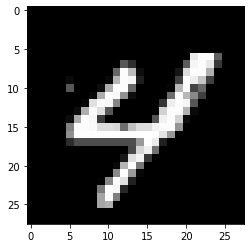

In [17]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[89
                   ],cmap='gray')

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [20]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [22]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [47]:
#u can see the power of 1*1 filter, when u see the nuber of trainable parameters reduces from 216k to 68k.
# cover the entire image..receptive field
from keras.layers import Activation, MaxPool2D
model = Sequential()

 
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
#model.add(Convolution2D(10, 1, activation='relu'))
#model.add(Convolution2D(10, 26))
#
model.add(Convolution2D(64,3,activation='relu'))
model.add(MaxPooling2D(2))

model.add(Convolution2D(10, 1, activation='relu'))
model.add(Convolution2D(32,3,activation='relu'))

#model.add(Convolution2D(10, 1, activation='relu'))
model.add(Convolution2D(64,3,activation='relu'))

#model.add(Convolution2D(10, 1, activation='relu'))

model.add(MaxPooling2D(2))
model.add(Convolution2D(10, 1, activation='relu'))

model.add(Convolution2D(10,4))

model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """


In [31]:


from keras.layers import Convolution2D
from keras.layers import Activation as act
from keras.layers import Flatten 
model_d=Sequential()
model_d.add(Convolution2D(32,3,3,activation='relu',input_shape=(28,28,1)))
#model_d.add(Convolution2D(10,1,activation='relu'))
model_d.add(Convolution2D(10,26) )#no activationn implies linear activation..........
model_d.add(Flatten())
model_d.add(act('softmax'))


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """


In [33]:
model_d.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 1, 1, 10)          216330    
_________________________________________________________________
flatten_3 (Flatten)          (None, 10)                0         
_________________________________________________________________
activation_3 (Activation)    (None, 10)                0         
Total params: 216,650
Trainable params: 216,650
Non-trainable params: 0
_________________________________________________________________


In [48]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_36 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 12, 12, 10)        650       
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 10, 10, 32)        2912      
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 8, 8, 64)          18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 4, 4, 64)         

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [50]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/10
60000/60000 [==============================] - 23s 381us/step - loss: 0.1691 - acc: 0.9471
Epoch 2/10
60000/60000 [==============================] - 22s 368us/step - loss: 0.0551 - acc: 0.9833
Epoch 3/10
60000/60000 [==============================] - 22s 367us/step - loss: 0.0402 - acc: 0.9872
Epoch 4/10
60000/60000 [==============================] - 22s 373us/step - loss: 0.0323 - acc: 0.9898
Epoch 5/10
60000/60000 [==============================] - 23s 378us/step - loss: 0.0271 - acc: 0.9913
Epoch 6/10
60000/60000 [==============================] - 23s 387us/step - loss: 0.0231 - acc: 0.9923
Epoch 7/10
60000/60000 [==============================] - 23s 388us/step - loss: 0.0199 - acc: 0.9938
Epoch 8/10
60000/60000 [==============================] - 24s 395us/step - loss: 0.0178 - acc: 0.9942
Epoch 9/10
60000/60000 [==============================] - 23s 389us/step - loss: 0.0151 - acc: 0.9952
Epoch 10/10
60000/60000 [==============================] - 23s 386us/step - loss: 

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [52]:
print(score)

[0.024137128384215247, 0.9926]


In [0]:
y_pred = model.predict(X_test)

In [54]:
print(y_pred[:9])
print(y_test[:9])

[[6.46138861e-16 6.49467806e-15 1.23899886e-08 1.03256348e-09
  6.19700527e-15 4.87895694e-13 3.37170794e-23 1.00000000e+00
  1.87699079e-10 9.77994308e-09]
 [1.19505010e-08 5.28682342e-09 1.00000000e+00 8.76747841e-11
  3.09463718e-12 5.06792677e-16 1.58994887e-10 5.84705895e-13
  1.18509369e-09 6.93853341e-14]
 [1.01758026e-07 9.99967456e-01 5.47929312e-06 3.01879272e-10
  2.35763059e-06 8.41765370e-07 4.97881672e-07 1.25953375e-05
  1.25255028e-07 1.04724886e-05]
 [9.99996543e-01 5.47808401e-17 4.30795594e-10 1.22739499e-10
  2.49861409e-10 3.13354009e-10 3.29550494e-06 4.20665547e-09
  6.97049813e-08 8.97229455e-08]
 [1.40698499e-16 5.09963738e-11 4.87452621e-14 1.69637025e-17
  9.99999881e-01 9.62128123e-14 2.56704796e-11 2.79899411e-12
  5.93689958e-11 6.68475408e-08]
 [6.28772483e-08 9.99961257e-01 2.53641815e-06 8.19375401e-11
  5.71261489e-06 1.79298013e-07 6.62214958e-08 1.50129326e-05
  1.53542302e-07 1.50081805e-05]
 [3.88565313e-17 1.32143718e-09 2.91984881e-10 8.20067812e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [56]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_14'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()

KeyError: ignored